Experiments with Vectorizing Nānā I Ke Kumu Vol1 using methods outlined in chapter 4 of `Applied Text Analysis with Python by Tony Ojeda, Rebecca Bilbro, Benjamin Bengfort` https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html

Full text pre-released version: https://github.com/changwookjun/StudyBook/blob/master/NLPBooks/Applied%20Text%20Analysis%20with%20Python.pdf

### Read in the text and create corpus of paragraphs

In [1]:
file='volume1.txt'

In [2]:
import os

def read_txt_data(fname):
    with open(os.getcwd()+'/' + fname,'r',) as f:
        # this way of reading the file gives a list of lines.
        data_text = f.read()
        f.close
    return data_text

text = read_txt_data(file)

In [3]:
def break_into_paragraphs(text):
    linebrkrmoved = []
    paragraph_list = text.split('\n\n')
    for paragraph in paragraph_list:
        if paragraph != ' ':
            linebrkrmoved.append(paragraph.replace('\n', ' '))
    return linebrkrmoved

list_paragraphs = break_into_paragraphs(text)   

In [4]:
clean_text = text.replace('\n', ' ')

In [19]:
import nltk
import string
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


def tokenize(text):
    #remove line breaks and numerics
    text = text.replace('[^a-zA-ZʻāēīūĀĒĪŪ]', '').replace('\n', ' ')
    # remove punctuation first
    text = text.translate(str.maketrans('','',string.punctuation))
    # convert to all lower
    text = str.lower(text)
    # tokenize by word
    tokens = nltk.word_tokenize(text)
    # get stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    # remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    # stem
    #stems = [stemmer.stem(t) for t in tokens]
    return tokens

def tokenize_and_stem(text):
    #remove line breaks and numerics
    text = text.replace('[^a-zA-ZʻāēīūĀĒĪŪ]', '').replace('\n', ' ')
    # remove punctuation first
    text = text.translate(str.maketrans('','',string.punctuation))
    # convert to all lower
    text = str.lower(text)
    # tokenize by word
    tokens = nltk.word_tokenize(text)
    # get stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    # remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    # stem
    stems = [stemmer.stem(t) for t in tokens]
    return stems

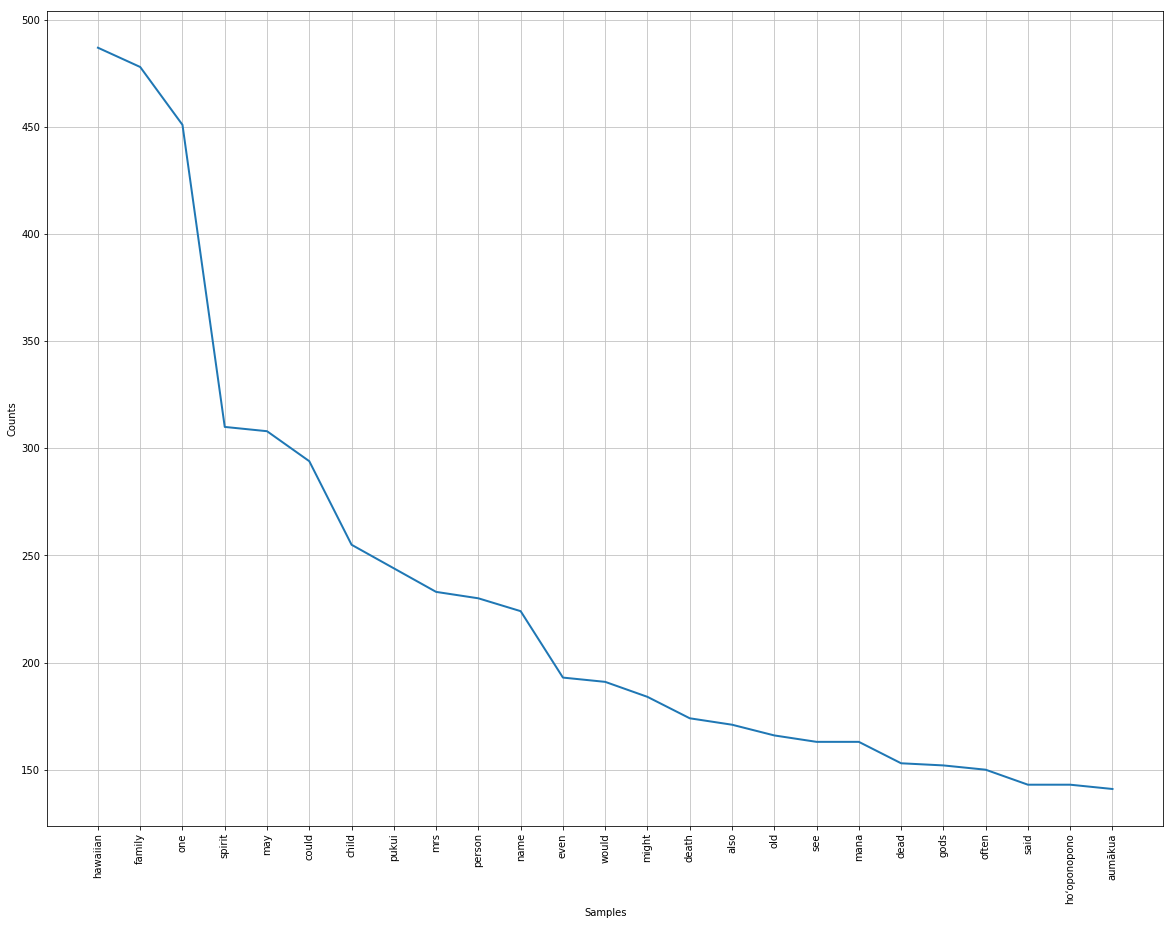

hawaiian;487
family;478
one;451
spirit;310
may;308
could;294
child;255
pukui;244
mrs;233
person;230
name;224
even;193
would;191
might;184
death;174
also;171
old;166
see;163
mana;163
dead;153
gods;152
often;150
said;143
hoʻoponopono;143
aumākua;141
many;141
hawaiians;139
body;135
ʻohana;134
aumakua;133
mother;132
god;128
ritual;124
kapu;123
back;116
hawaii;115
man;115
called;111
used;111
given;107
woman;106
ka;105
sometimes;103
bones;102
life;100
another;100
must;100
time;99
go;99
case;99


In [73]:
import matplotlib.pyplot as plt
import nltk
import string
# Figures inline and set visualization style
%matplotlib inline
plt.figure(figsize=(20, 15)) 


def plot_top_25(text, tokenizer):
    text = text.lower()
    words = tokenizer(text)
    freqdist1 = nltk.FreqDist(words)
    freqdist1.plot(25)
    for word, frequency in freqdist1.most_common(50):
        print(u'{};{}'.format(word, frequency))

plot_top_25(clean_text, tokenize)

In [74]:
## import pandas as pd
from nltk.util import ngrams
from collections import Counter

## Helper Functions
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(x, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(tokenize(x),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurence"]
        out = pd.concat([out, table], axis=1)
    return out

gram_table(text, [2, 3, 4], 50)

,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence
0,mrs pukui,169,mary kawena pukui,34,polynesian family system kaʻu,14
1,waha ʻawa,36,says mrs pukui,25,poʻe kahiko people old,13
2,kawena pukui,35,aumākua ancestor gods,20,ka poʻe kahiko people,13
3,mary kawena,34,wehe ka paipala,16,kamakau ka poʻe kahiko,11
4,pī kai,31,mrs pukui explains,15,collection hawaiian antiquities vol,9
5,ti leaves,30,family system kaʻu,14,lawe ka wa make,9
6,family members,29,polynesian family system,14,fornander collection hawaiian antiquities,9
7,ancestor gods,28,kahiko people old,13,pukui polynesian family system,7
8,old hawaii,28,ka poʻe kahiko,13,family system kaʻu p,7
9,grief work,27,poʻe kahiko people,13,kahiko people old p,7


In [77]:
# Topic Modeling

# intuitive expaination of LDA
# https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158

from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))
    
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)
    
def LDA(text):
    # Calling our overwritten Count vectorizer
    tf_vectorizer = LemmaCountVectorizer(max_df=0.95, min_df=2,
                                              stop_words='english',
                                              decode_error='ignore')
    tf = tf_vectorizer.fit_transform(text)


    lda = LatentDirichletAllocation(n_components=20, max_iter=5,
                                    learning_method = 'online',
                                    learning_offset = 50.,
                                    random_state = 0)

    lda.fit(tf)

    n_top_words = 10
    print("\nTopics in LDA model: ")
    tf_feature_names = tf_vectorizer.get_feature_names()
    print_top_words(lda, tf_feature_names, n_top_words)

    
LDA(tokenize(text))


Topics in LDA model: 

Topic #0:hawaiian member life hoʻoponopono piko thing husband need cause taboo

Topic #1:pukui mr used ʻuhane year mary culture grandparent kept report

Topic #2:old client possession relationship mean cord literally human pp especially

Topic #3:called ʻunihipili senior house took believed form interpretation girl physical

Topic #4:baby ti ʻawa kahuna possessed fear reason birth social point

Topic #5:spirit time help feeling died experience known kahu worker account

Topic #6:belief like curse leaf oneʻs home hānai elder kawena religious

Topic #7:grief know kai inoa pī bible christian meant guilt felt

Topic #8:god hawaii thought later deriv going present night wahine eye

Topic #9:woman ritual mother said aumakua water waha work problem long

Topic #10:example ʻoki traditional good son place shark line taken statement

Topic #11:death today came vision pō ceremony great die probably kupuna

Topic #12:body come living noho away parent traditionally emotional

/anaconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


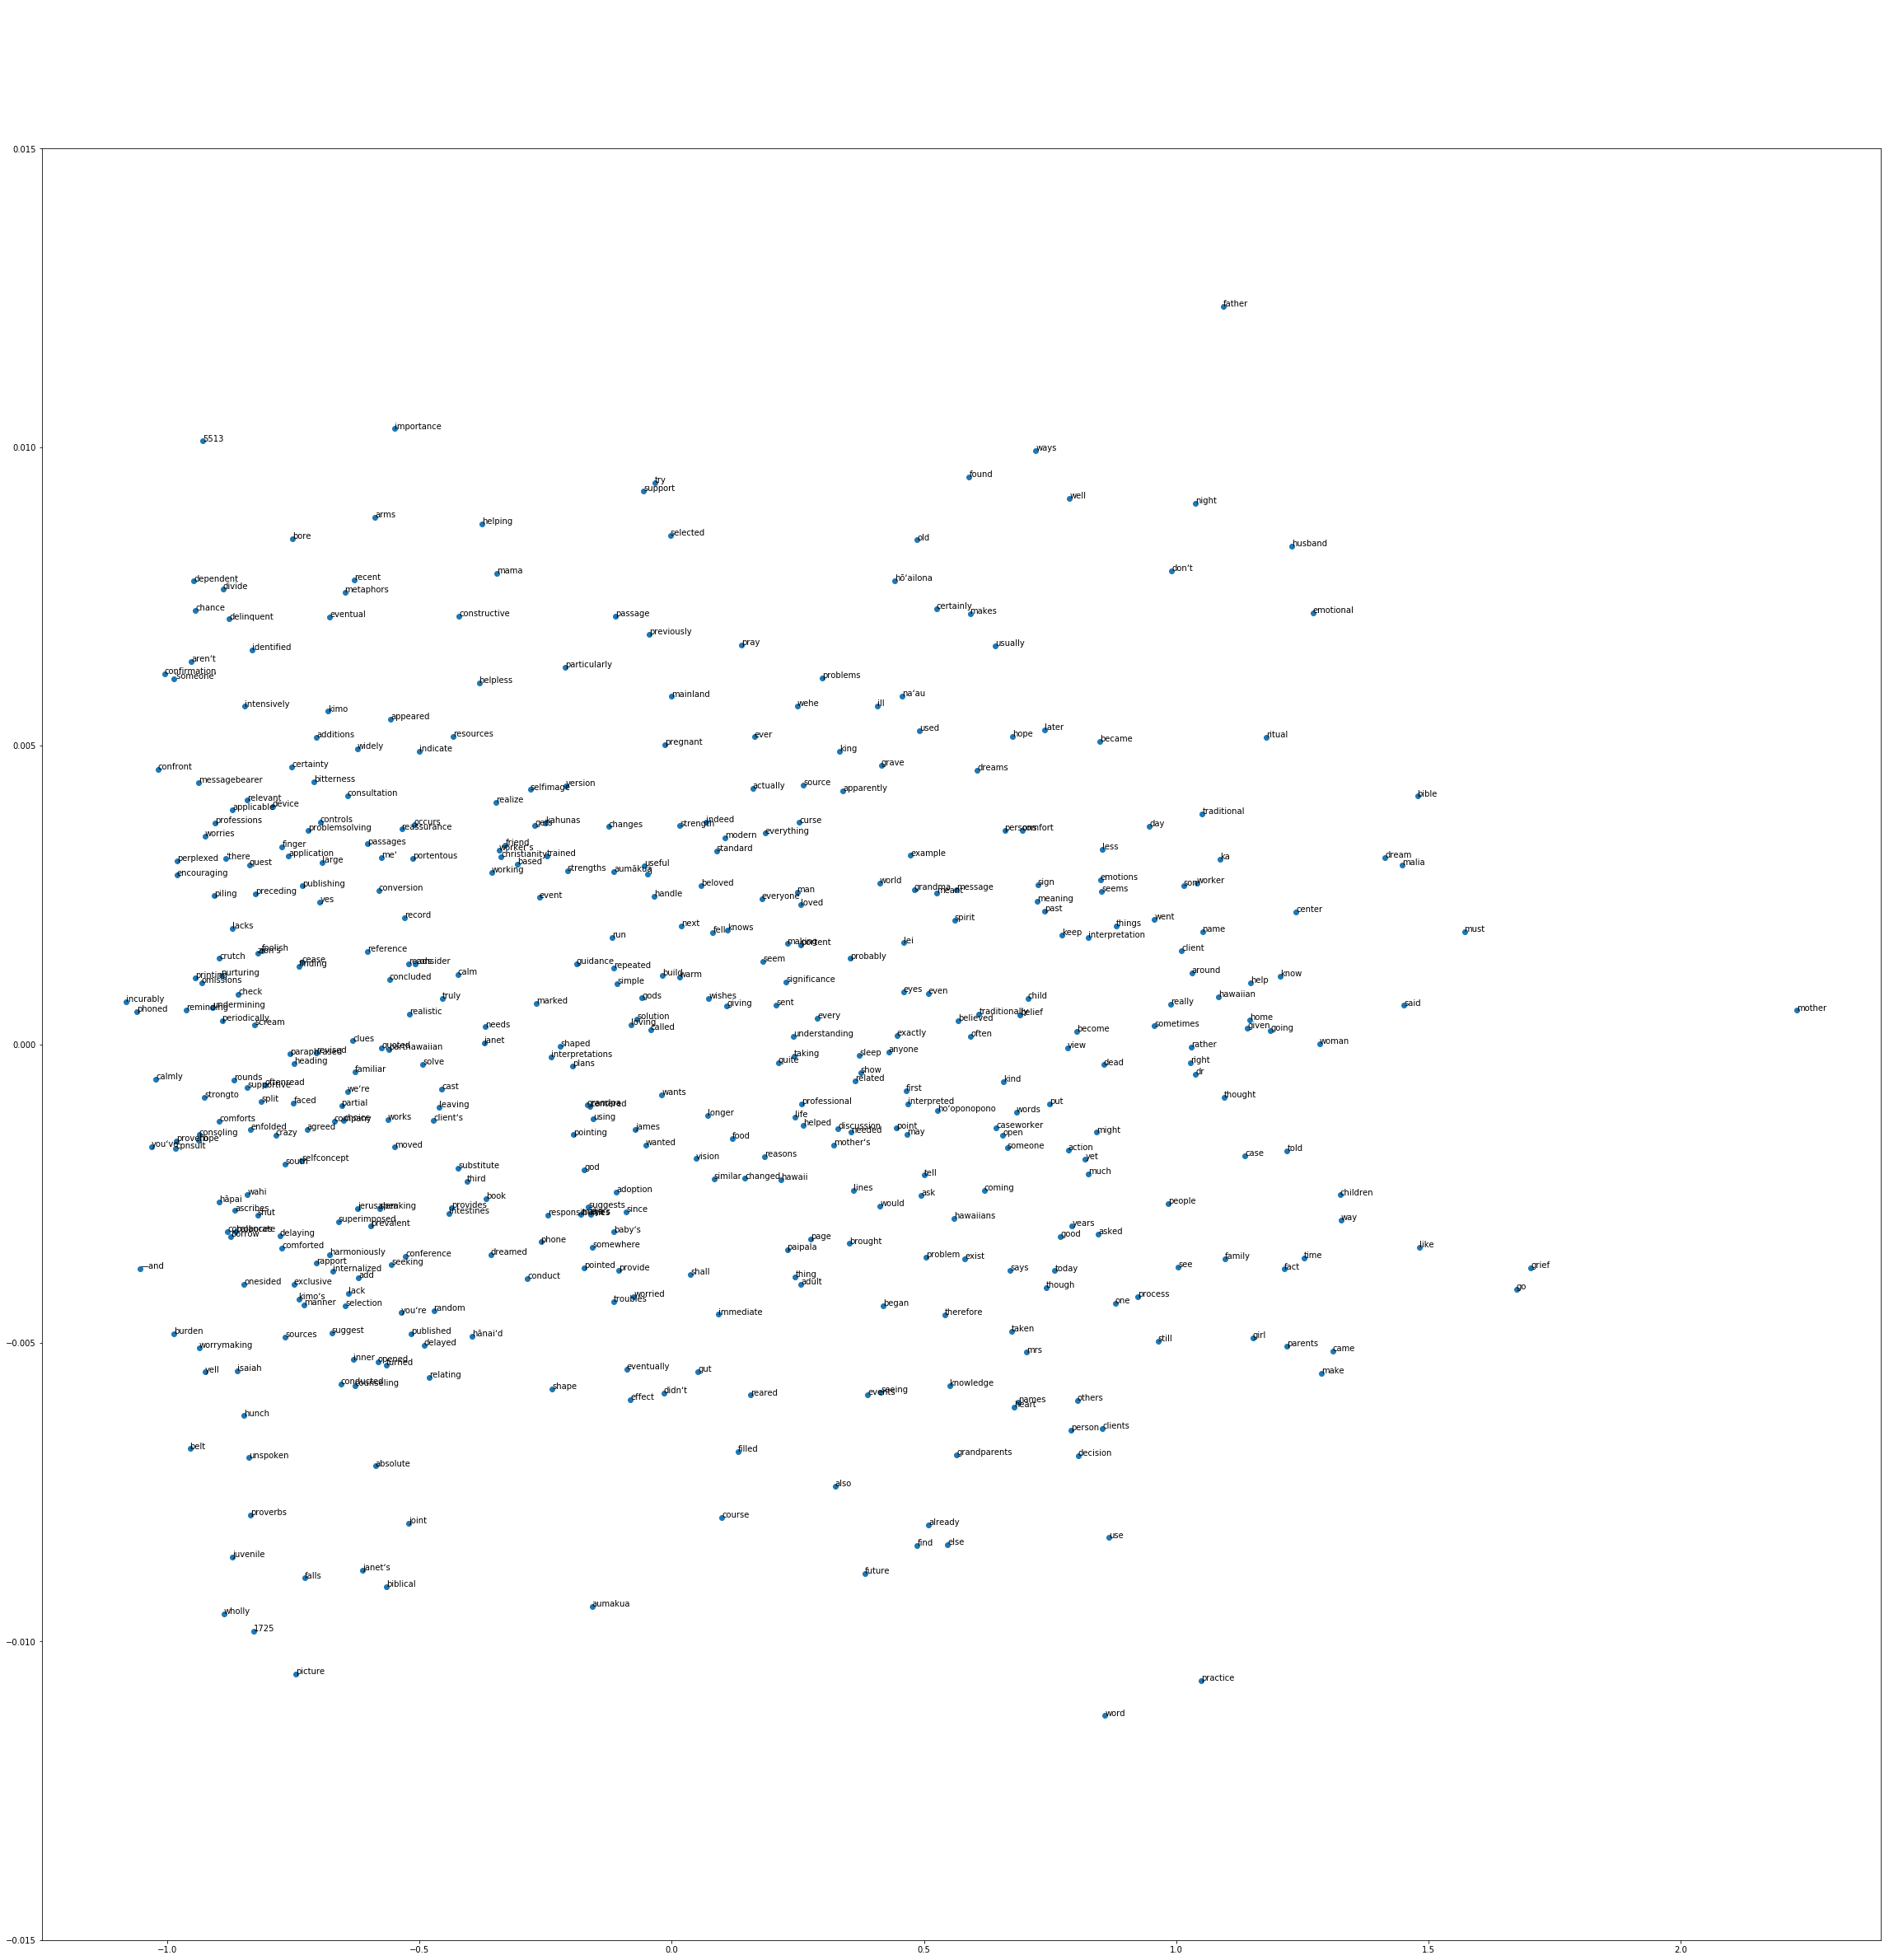

/anaconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


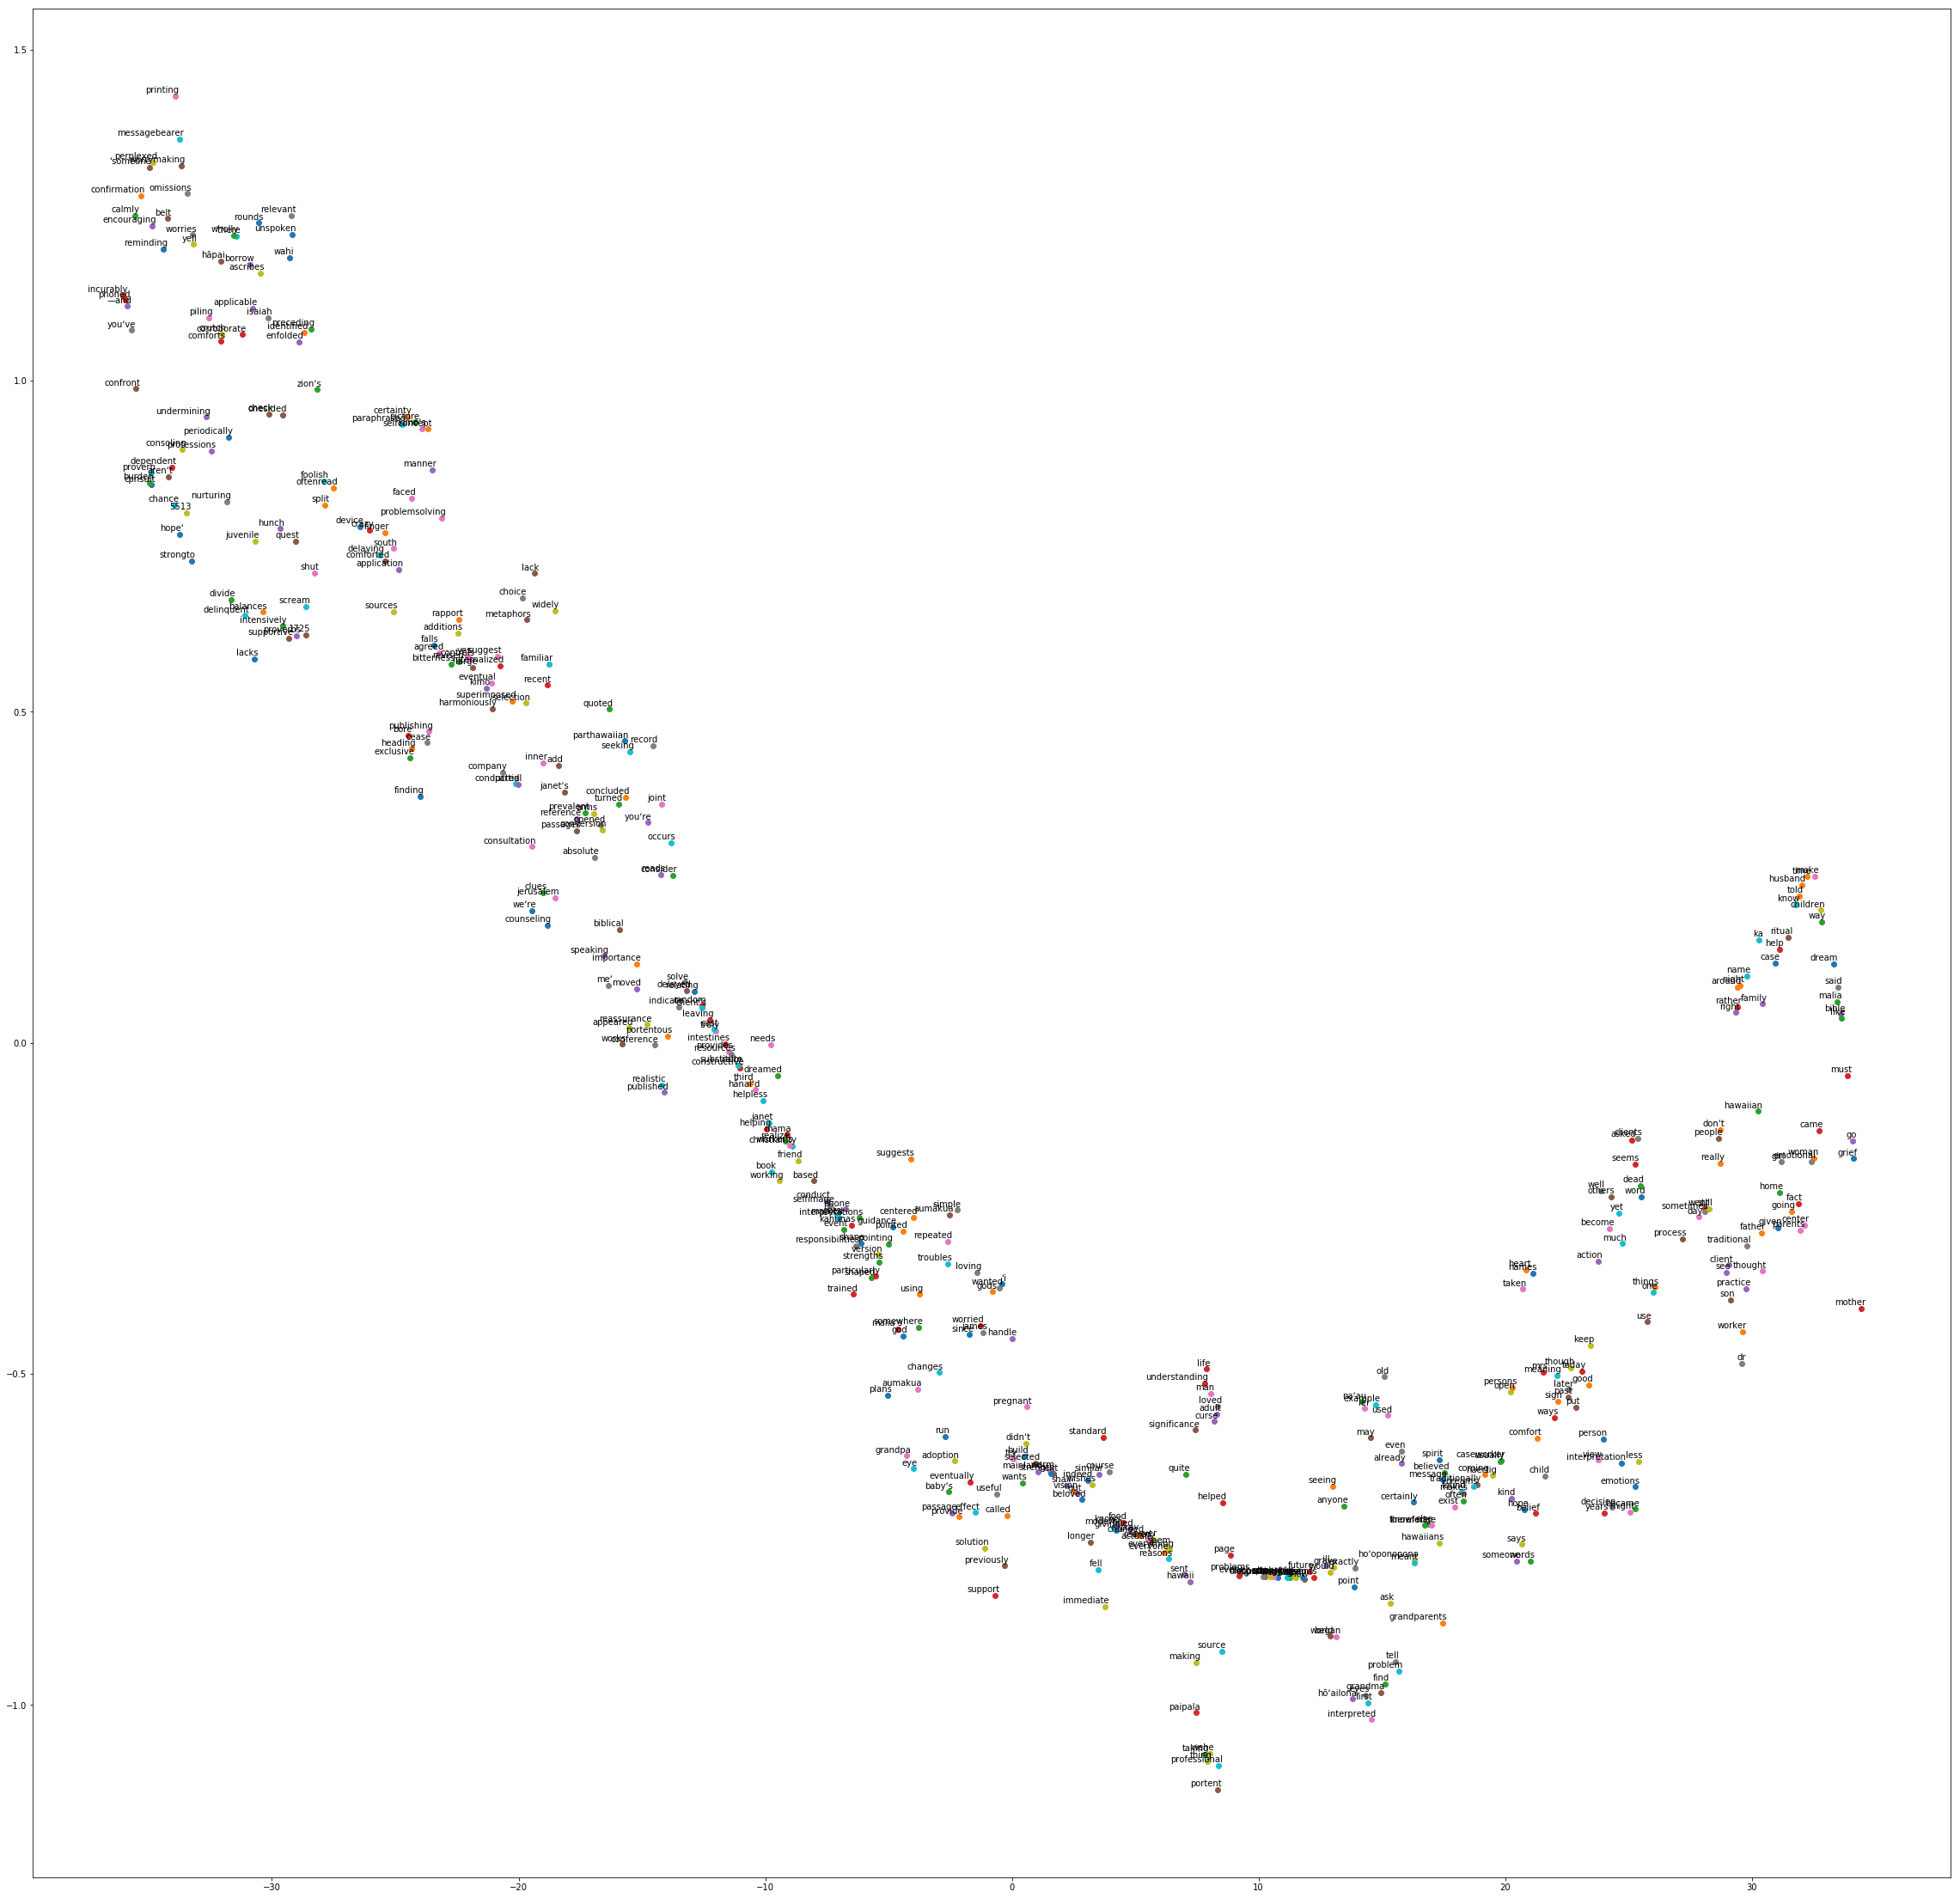

In [80]:
# Word 2 Vec
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(40, 40)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

def w2vec(data,yrange):
    wvec = [tokenize(paragraph) for paragraph in list_paragraphs] 
    model = Word2Vec(wvec, min_count=1, max_vocab_size=500)
    # model.save('model.bin')
    # new_model = Word2Vec.load('model.bin')
    
    # summarize the loaded model
    # print(model)

    X = model[model.wv.vocab]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    # create a scatter plot of the projection
    plt.rcParams["figure.figsize"] = [40,40]

    plt.scatter(result[:, 0], result[:, 1])
    words = list(model.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.ylim(yrange)   

    plt.show()
    
    tsne_plot(model)
    



w2vec(text,[-.015,.015])

In [51]:
para_corpus = [tokenize(paragraph) for paragraph in list_paragraphs] 
para_corpus
#stems = [stemmer.stem(t) for t in tokens]

[['nānā', 'ke', 'kumu', 'look', 'source', 'ask', 'ask', 'highpriest'],
 ['e', 'ui', 'e', 'ui', 'ke', 'kahuna', 'nui'],
 ['generations', 'new', 'generations', 'past'],
 ['na', 'hanauna', 'hou', 'na', 'hanauna', 'hala'],
 ['flower'],
 ['ʻowai', 'ka', 'pua', 'luna'],
 ['work', 'god'],
 ['aha', 'ka', 'hana', 'kēlā', 'akua'],
 ['generations'],
 ['e', 'na', 'hanauna', 'e'],
 ['generations', 'spread'],
 ['na', 'hanauna', 'laha', 'hou'],
 ['quickly', 'plain'],
 ['ka', 'hiki', 'wawe', 'ke', 'kahua'],
 ['ask', 'ask', 'highpriest'],
 ['e', 'ui', 'e', 'ui', 'ke', 'kahuna', 'nui'],
 ['generations', 'new', 'generations', 'past'],
 ['na', 'hanauna', 'hou', 'na', 'hanauna', 'hala'],
 ['excerpts', 'ancient', 'chant', '“', 'deluge', '”'],
 ['ʻahaʻaina', 'hoʻokēʻai—fasting', 'feasting'],
 ['ʻahaʻaina—feast',
  'feasting',
  'feasts',
  'held',
  'purely',
  'human',
  'comfort',
  'enjoyment',
  'andor',
  'commune',
  'seek',
  'help',
  'pardon',
  'gods'],
 ['supernatural', 'context', 'prechristian', 

### Tokenizer  
The tokenize method performs some lightweight normalization, stripping punctuation using the string.punctuation character set and setting the text to lowercase. This function also performs some feature reduction using the SnowballStemmer to remove affixes such as plurality (“bats” and “bat” are the same token). The examples in the next section will utilize this example corpus and some will use the tokenization method.

In [22]:
# def tokenize(text):
#     stem = nltk.stem.SnowballStemmer('english')
#     text = text.lower()
#     for token in nltk.word_tokenize(text):
#         if token in string.punctuation: continue
#         yield stem.stem(token)

### Frequecy Vectors 

The simplest vector encoding model is to simply fill in the vector with the frequency of each word as it appears in the document. In this encoding scheme, each document is represented as the multiset of the tokens that compose it and the value for each word position in the vector is its count.

#### With NLTK  
NLTK expects features as a dict object whose keys are the names of the features and whose values are boolean or numeric. To encode our documents in this way, we’ll create a vectorize function that creates a dictionary whose keys are the tokens in the document and whose values are the number of times that token appears in the document.

The defaultdict object allows us to specify what the dictionary will return for a key that hasn’t been assigned to it yet. By setting defaultdict(int) we are specifying that a 0 should be returned, thus creating a simple counting dictionary. We can map this function to every item in the corpus using the last line of code, creating an iterable of vectorized documents.

In [ ]:
from collections import defaultdict

# Use our list of paragraphs as the corpus
corpus = list_paragraphs

def vectorize(doc):
    features = defaultdict(int)
    for token in tokenize(doc):
        features[token] += 1
    return features

vectors = map(vectorize, corpus)

#### In Scikit-Learn
The CountVectorizer transformer from the sklearn.feature_extraction model has its own internal tokenization and normalization methods. The fit method of the vectorizer expects an iterable or list of strings or file objects, and creates a dictionary of the vocabulary on the corpus. When transform is called, each individual document is transformed into a sparse array whose index tuple is the row (the document ID) and the token ID from the dictionary, and whose value is the count:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(list_paragraphs)

In [ ]:
vectors

#### The Gensim way
Gensim’s frequency encoder is called doc2bow. To use doc2bow, we first create a Gensim Dictionary that maps tokens to indices based on observed order (eliminating the overhead of lexicographic sorting). The dictionary object can be loaded or saved to disk, and implements a doc2bow library that accepts a pretokenized document and returns a sparse matrix of (id, count) tuples where the id is the token’s id in the dictionary. Because the doc2bow method only takes a single document instance, we use the list comprehension to restore the entire corpus, loading the tokenized documents into memory so we don’t exhaust our generator:

In [ ]:
import gensim

corpus  = [tokenize(doc) for doc in corpus]
id2word = gensim.corpora.Dictionary(corpus)
vectors = [
    id2word.doc2bow(doc) for doc in corpus
]

### One-Hot Encoding
Because they disregard grammar and the relative position of words in documents, frequency-based encoding methods suffer from the long tail, or Zipfian distribution, that characterizes natural language. As a result, tokens that occur very frequently are orders of magnitude more “significant” than other, less frequent ones. This can have a significant impact on some models (e.g., generalized linear models) that expect normally distributed features.

A solution to this problem is one-hot encoding, a boolean vector encoding method that marks a particular vector index with a value of true (1) if the token exists in the document and false (0) if it does not. In other words, each element of a one-hot encoded vector reflects either the presence or absence of the token in the described text.

One-hot encoding reduces the imbalance issue of the distribution of tokens, simplifying a document to its constituent components. This reduction is most effective for very small documents (sentences, tweets) that don’t contain very many repeated elements, and is usually applied to models that have very good smoothing properties. One-hot encoding is also commonly used in artificial neural networks, whose activation functions require input to be in the discrete range of [0,1] or [-1,1].

One-hot encoding represents similarity and difference at the document level, but because all words are rendered equidistant, it is not able to encode per-word similarity. Moreover, because all words are equally distant, word form becomes incredibly important; the tokens “trying” and “try” will be equally distant from unrelated tokens like “red” or “bicycle”! Normalizing tokens to a single word class, either through stemming or lemmatization, which we’ll explore later in this chapter, ensures that different forms of tokens that embed plurality, case, gender, cardinality, tense, etc., are treated as single vector components, reducing the feature space and making models more performant.

#### With NLTK
The NLTK implementation of one-hot encoding is a dictionary whose keys are tokens and whose value is True.  Dictionaries act as simple sparse matrices in the NLTK case because it is not necessary to mark every absent word False. In addition to the boolean dictionary values, it is also acceptable to use an integer value; 1 for present and 0 for absent.

In [ ]:
def vectorize(doc):
    return {
        token: True
        for token in doc
    }

vectors = map(vectorize, corpus)

#### In Scikit-Learn
In Scikit-Learn, one-hot encoding is implemented with the Binarizer transformer in the preprocessing module. The Binarizer takes only numeric data, so the text data must be transformed into a numeric space using the CountVectorizer ahead of one-hot encoding. The Binarizer class uses a threshold value (0 by default) such that all values of the vector that are less than or equal to the threshold are set to zero, while those that are greater than the threshold are set to 1. Therefore, by default, the Binarizer converts all frequency values to 1 while maintaining the zero-valued frequencies. 

The corpus.toarray() method is optional; it converts the sparse matrix representation to a dense one. In corpora with large vocabularies, the sparse matrix representation is much better. Note that we could also use CountVectorizer(binary=True) to achieve one-hot encoding in the above, obviating the Binarizer.

In [ ]:
from sklearn.preprocessing import Binarizer

freq   = CountVectorizer()
corpus = freq.fit_transform(corpus)

onehot = Binarizer()
corpus = onehot.fit_transform(corpus.toarray())

#### The Gensim way
While Gensim does not have a specific one-hot encoder, its doc2bow method returns a list of tuples that we can manage on the fly. Extending the code from the Gensim frequency vectorization example in the previous section, we can one-hot encode our vectors with our id2word dictionary. To get our vectors, an inner list comprehension converts the list of tuples returned from the doc2bow method into a list of (token_id, 1) tuples and the outer comprehension applies that converter to all documents in the corpus.  

One-hot encoding represents similarity and difference at the document level, but because all words are rendered equidistant, it is not able to encode per-word similarity. Moreover, because all words are equally distant, word form becomes incredibly important; the tokens “trying” and “try” will be equally distant from unrelated tokens like “red” or “bicycle”! Normalizing tokens to a single word class, either through stemming or lemmatization, which we’ll explore later in this chapter, ensures that different forms of tokens that embed plurality, case, gender, cardinality, tense, etc., are treated as single vector components, reducing the feature space and making models more performant.

In [ ]:
corpus  = [tokenize(doc) for doc in corpus]
id2word = gensim.corpora.Dictionary(corpus)
vectors = [
    [(token[0], 1) for token in id2word.doc2bow(doc)]
    for doc in corpus
]

#### The Gensim way
While Gensim does not have a specific one-hot encoder, its doc2bow method returns a list of tuples that we can manage on the fly. Extending the code from the Gensim frequency vectorization example in the previous section, we can one-hot encode our vectors with our id2word dictionary. To get our vectors, an inner list comprehension converts the list of tuples returned from the doc2bow method into a list of (token_id, 1) tuples and the outer comprehension applies that converter to all documents in the corpus:

In [ ]:
corpus  = [tokenize(doc) for doc in corpus]
id2word = gensim.corpora.Dictionary(corpus)
vectors = [
    [(token[0], 1) for token in id2word.doc2bow(doc)]
    for doc in corpus
]

#### Term Frequency–Inverse Document Frequency
The bag-of-words representations that we have explored so far only describe a document in a standalone fashion, not taking into account the context of the corpus. A better approach would be to consider the relative frequency or rareness of tokens in the document against their frequency in other documents. The central insight is that meaning is most likely encoded in the more rare terms from a document. For example, in a corpus of sports text, tokens such as “umpire,” “base,” and “dugout” appear more frequently in documents that discuss baseball, while other tokens that appear frequently throughout the corpus, like “run,” “score,” and “play,” are less important.

TF–IDF, term frequency–inverse document frequency, encoding normalizes the frequency of tokens in a document with respect to the rest of the corpus. This encoding approach accentuates terms that are very relevant to a specific instance

TF–IDF is computed on a per-term basis, such that the relevance of a token to a document is measured by the scaled frequency of the appearance of the term in the document, normalized by the inverse of the scaled frequency of the term in the entire corpus.

#### With NLTK
To vectorize text in this way with NLTK, we use the TextCollection class, a wrapper for a list of texts or a corpus consisting of one or more texts. This class provides support for counting, concordancing, collocation discovery, and more importantly, computing tf_idf.

Because TF–IDF requires the entire corpus, our new version of vectorize does not accept a single document, but rather all documents. After applying our tokenization function and creating the text collection, the function goes through each document in the corpus and yields a dictionary whose keys are the terms and whose values are the TF–IDF score for the term in that particular document.

In [ ]:
from nltk.text import TextCollection

def vectorize(corpus):
    corpus = [tokenize(doc) for doc in corpus]
    texts  = TextCollection(corpus)

    for doc in corpus:
        yield {
            term: texts.tf_idf(term, doc)
            for term in doc
        }

#### In Scikit-Learn
Scikit-Learn provides a transformer called the TfidfVectorizer in the module called feature_extraction.text for vectorizing documents with TF–IDF scores. Under the hood, the TfidfVectorizer uses the CountVectorizer estimator we used to produce the bag-of-words encoding to count occurrences of tokens, followed by a TfidfTransformer, which normalizes these occurrence counts by the inverse document frequency.

The input for a TfidfVectorizer is expected to be a sequence of filenames, file-like objects, or strings that contain a collection of raw documents, similar to that of the CountVectorizer. As a result, a default tokenization and preprocessing method is applied unless other functions are specified. The vectorizer returns a sparse matrix representation in the form of ((doc, term), tfidf) where each key is a document and term pair and the value is the TF–IDF score.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()
corpus = tfidf.fit_transform(corpus)

#### The Gensim way
In Gensim, the TfidfModel data structure is similar to the Dictionary object in that it stores a mapping of terms and their vector positions in the order they are observed, but additionally stores the corpus frequency of those terms so it can vectorize documents on demand. As before, Gensim allows us to apply our own tokenization method, expecting a corpus that is a list of lists of tokens. We first construct the lexicon and use it to instantiate the TfidfModel, which computes the normalized inverse document frequency. We can then fetch the TF–IDF representation for each vector using a getitem, dictionary-like syntax, after applying the doc2bow method to each document using the lexicon.

In [ ]:
corpus  = [tokenize(doc) for doc in corpus]
lexicon = gensim.corpora.Dictionary(corpus)
tfidf   = gensim.models.TfidfModel(dictionary=lexicon, normalize=True)
vectors = [tfidf[lexicon.doc2bow(doc)] for doc in corpus]

### Distributed Representation
While frequency, one-hot, and TF–IDF encoding enable us to put documents into vector space, it is often useful to also encode the similarities between documents in the context of that same vector space. Unfortunately, these vectorization methods produce document vectors with non-negative elements, which means we won’t be able to compare documents that don’t share terms (because two vectors with a cosine distance of 1 will be considered far apart, even if they are semantically similar).

When document similarity is important in the context of an application, we instead encode text along a continuous scale with a distributed representation. This means that the resulting document vector is not a simple mapping from token position to token score. Instead, the document is represented in a feature space that has been embedded to represent word similarity. The complexity of this space (and the resulting vector length) is the product of how the mapping to that representation is learned. The complexity of this space (and the resulting vector length) is the product of how that representation is trained and not directly tied to the document itself.

Word2vec, created by a team of researchers at Google led by Tomáš Mikolov, implements a word embedding model that enables us to create these kinds of distributed representations. The word2vec algorithm trains word representations based on either a continuous bag-of-words (CBOW) or skip-gram model, such that words are embedded in space along with similar words based on their context. For example, Gensim’s implementation uses a feedforward network.

The doc2vec1 algorithm is an extension of word2vec. It proposes a paragraph vector—an unsupervised algorithm that learns fixed-length feature representations from variable length documents. This representation attempts to inherit the semantic properties of words such that “red” and “colorful” are more similar to each other than they are to “river” or “governance.” Moreover, the paragraph vector takes into consideration the ordering of words within a narrow context, similar to an n-gram model. The combined result is much more effective than a bag-of-words or bag-of-n-grams model because it generalizes better and has a lower dimensionality but still is of a fixed length so it can be used in common machine learning algorithms.

#### The Gensim way
Neither NLTK nor Scikit-Learn provide implementations of these kinds of word embeddings. Gensim’s implementation allows users to train both word2vec and doc2vec models on custom corpora and also conveniently comes with a model that is pretrained on the Google news corpus.

###### NOTE
To use Gensim’s pretrained models, you’ll need to download the model bin file, which clocks in at 1.5 GB. For applications that require extremely lightweight dependencies (e.g., if they have to run on an AWS lambda instance), this may not be practicable.

We can train our own model as follows. First, we use a list comprehension to load our corpus into memory. (Gensim supports streaming, but this will enable us to avoid exhausting the generator.) Next, we create a list of TaggedDocument objects, which extend the LabeledSentence, and in turn the distributed representation of word2vec. TaggedDocument objects consist of words and tags. We can instantiate the tagged document with the list of tokens along with a single tag, one that uniquely identifies the instance. In this example, we’ve labeled each document as "d{}".format(idx), e.g. d0, d1, d2 and so forth.

Once we have a list of tagged documents, we instantiate the Doc2Vec model and specify the size of the vector as well as the minimum count, which ignores all tokens that have a frequency less than that number. The size parameter is usually not as low a dimensionality as 5; we selected such a small number for demonstration purposes only. We also set the min_count parameter to zero to ensure we consider all tokens, but generally this is set between 3 and 5, depending on how much information the model needs to capture. Once instantiated, an unsupervised neural network is trained to learn the vector representations, which can then be accessed via the docvecs property.

In [ ]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

corpus = [list(tokenize(doc)) for doc in corpus]
corpus = [
    TaggedDocument(words, ['d{}'.format(idx)])
    for idx, words in enumerate(corpus)
]

model = Doc2Vec(corpus, size=5, min_count=0)
print(model.docvecs[0])
# [ 0.01797447 -0.01509272  0.0731937   0.06814702 -0.0846546 ]

Distributed representations will dramatically improve results over TF–IDF models when used correctly. The model itself can be saved to disk and retrained in an active fashion, making it extremely flexible for a variety of use cases. However, on larger corpora, training can be slow and memory intensive, and it might not be as good as a TF–IDF model with Principal Component Analysis (PCA) or Singular Value Decomposition (SVD) applied to reduce the feature space. In the end, however, this representation is breakthrough work that has led to a dramatic improvement in text processing capabilities of data products in recent years.